Below consists of code written in support of the Final Report.

The dataset used in this code can be found here: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

In the name of brevity, we will eschew copying over the entirety of the Intermediate Report. Instead, only the data preprocessing and the best versions of the models tested will be reiterated here, before getting into the new explorations and testing of our Final Report. 

To begin, we will have our imports:

In [1]:
pip install ISLP


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ISLP.models import (ModelSpec as MS,
                         summarize)
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, show
import statsmodels.api as sm
from ISLP import confusion_table
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import \
     (ShuffleSplit)
from sklearn.model_selection import ShuffleSplit
import statsmodels.api as sm
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.ensemble import \
     (RandomForestClassifier as RF,
      GradientBoostingClassifier as GBR)

Now, we will load our dataset:

In [3]:
heartData = pd.read_csv('heart_failure_clinical_records_dataset.csv')
resetData = heartData
heartData

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Check for correlations:

In [4]:
heartData.corr(numeric_only=True)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Identification of outliers in serum creatinine:

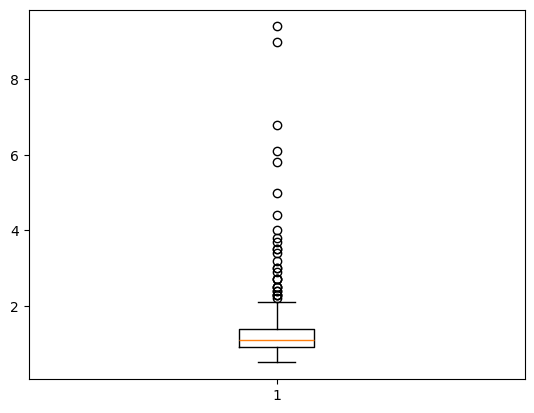

In [5]:
fig, ax = subplots()
ax.boxplot(heartData['serum_creatinine'])
show()

Now let's list our our 5 best unique models from our intermediate report:

For all five of these models, we identified in the intermediate report the most optimal coefficients to be: age, ejection fraction, serum creatinine, and time.

First, Logistic Regression:

In [6]:
heartData = resetData

heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=79)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
logResults = glm.fit()
print(summarize(logResults))

probs = logResults.predict(X_test)

labels = np.array([0]*149)
labels[probs>0.5] = 1

confusion_table(labels, y_test)

                     coef  std err      z  P>|z|
intercept          1.4511    1.280  1.134  0.257
age                0.0330    0.018  1.840  0.066
ejection_fraction -0.0860    0.022 -3.987  0.000
serum_creatinine   0.6065    0.209  2.897  0.004
time              -0.0159    0.003 -4.643  0.000


Truth,False,True
Predicted,,
False,95,10
True,9,35


Second, Linear Discriminant Analysis:

In [7]:
heartData = resetData
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=79)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

lda = LDA(store_covariance=True)

lda.fit(X_train, y_train)

lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,False,True
Predicted,,
False,95,10
True,9,35


Third, Quadratic Discriminant Analysis:

In [8]:
heartData = resetData
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=79)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

qda = QDA(store_covariance=True, reg_param=0.3)
qda.fit(X_train, y_train)

qda_pred = qda.predict(X_test)
confusion_table(qda_pred, y_test)

Truth,False,True
Predicted,,
False,94,9
True,10,36


Fourth, Naive Bayes:

In [9]:
heartData = resetData
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=79)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

NB = GaussianNB()
NB.fit(X_train, y_train)

nb_labels = NB.predict(X_test)
confusion_table(nb_labels, y_test)

Truth,False,True
Predicted,,
False,101,16
True,3,29


Fifth, K-Nearest Neighbors, with k = 20 and no rescaling:

In [10]:
heartData = resetData
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=79)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

knn1 = KNeighborsClassifier(n_neighbors=20)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,101,12
True,3,33


In our intermediate report, we tested these models on multiple random seeds, and based on those results, came up with a rough ranking of the models, which is as follows:

1. K-Nearest Neighbors
2. (Tie) Logistic Regression
2. (Tie) Linear Discriminant Analysis
2. (Tie) Quadratic Discriminant Aanalysis
3. Naive Bayes

However, as noted in the conclusion of the report, this was a rough and non-precise way to compare the models, and that better techniques should be explored in the final report. Thus, this is where we will begin with our final report.

In order to do this, we will use cross validation to estimate the average R^2 and variability of our models. To get one combined number we can use to compare our models, we will take the average R^2 and subtract it by the variability.

Let's go in order, starting with our logistic regression model:

In [11]:
heartData = resetData

X = heartData.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'], axis=1)
y = heartData['DEATH_EVENT']

cv = ShuffleSplit(n_splits=10, test_size=100, random_state=0)
scores = []

for train_idx, test_idx in cv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial()).fit()
    preds = model.predict(sm.add_constant(X_test)) > 0.5
    acc = (preds == y_test).mean()
    scores.append(acc)

R2 = np.mean(scores)
var = np.std(scores)

print("R2: " + str(R2))
print("Variability: " + str(var))
print("Combined score: " + str(R2-var))


R2: 0.8109999999999999
Variability: 0.03753664875824691
Combined score: 0.773463351241753


Next, LDA:

In [12]:
heartData = resetData

allvars = heartData.columns.drop([
    'serum_sodium', 'anaemia', 'creatinine_phosphokinase',
    'diabetes', 'high_blood_pressure', 'platelets',
    'sex', 'smoking', 'DEATH_EVENT'
])

design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData['DEATH_EVENT'] == 1  # Binary target

cv = ShuffleSplit(n_splits=10, test_size=100, random_state=0)
scores = []

for train_idx, test_idx in cv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    lda = LDA(store_covariance=True)
    lda.fit(X_train, y_train)

    preds = lda.predict(X_test)
    acc = (preds == y_test).mean()
    scores.append(acc)

R2 = np.mean(scores)
var = np.std(scores)

print("R2: " + str(R2))
print("Variability: " + str(var))
print("Combined score: " + str(R2-var))

R2: 0.8140000000000001
Variability: 0.033226495451672285
Combined score: 0.7807735045483277


Next, QDA:

In [13]:
heartData = resetData

allvars = heartData.columns.drop([
    'serum_sodium', 'anaemia', 'creatinine_phosphokinase',
    'diabetes', 'high_blood_pressure', 'platelets',
    'sex', 'smoking', 'DEATH_EVENT'
])

design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData['DEATH_EVENT'] == 1  # Binary target

cv = ShuffleSplit(n_splits=10, test_size=100, random_state=0)
scores = []

for train_idx, test_idx in cv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    qda = QDA(store_covariance=True, reg_param=0.3)
    qda.fit(X_train, y_train)

    preds = qda.predict(X_test)
    acc = (preds == y_test).mean()
    scores.append(acc)

R2 = np.mean(scores)
var = np.std(scores)

print("R2: " + str(R2))
print("Variability: " + str(var))
print("Combined score: " + str(R2-var))

R2: 0.8030000000000002
Variability: 0.03822302970723277
Combined score: 0.7647769702927674


Next, Naive Bayes:

In [14]:
heartData = resetData

allvars = heartData.columns.drop([
    'serum_sodium', 'anaemia', 'creatinine_phosphokinase',
    'diabetes', 'high_blood_pressure', 'platelets',
    'sex', 'smoking', 'DEATH_EVENT'
])

design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData['DEATH_EVENT'] == 1 

cv = ShuffleSplit(n_splits=10, test_size=100, random_state=0)
scores = []

for train_idx, test_idx in cv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    NB = GaussianNB()
    NB.fit(X_train, y_train)

    preds = NB.predict(X_test)
    acc = (preds == y_test).mean()
    scores.append(acc)

R2 = np.mean(scores)
var = np.std(scores)

print("R2: " + str(R2))
print("Variability: " + str(var))
print("Combined score: " + str(R2-var))

R2: 0.8059999999999998
Variability: 0.05141984052872976
Combined score: 0.7545801594712701


Finally, KNN:

In [15]:
heartData = resetData

allvars = heartData.columns.drop([
    'serum_sodium', 'anaemia', 'creatinine_phosphokinase',
    'diabetes', 'high_blood_pressure', 'platelets',
    'sex', 'smoking', 'DEATH_EVENT'
])

design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData['DEATH_EVENT'] == 1 

cv = ShuffleSplit(n_splits=10, test_size=100, random_state=0)
scores = []

for train_idx, test_idx in cv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    knn1 = KNeighborsClassifier(n_neighbors=9)
    X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
    knn1.fit(X_train, y_train)
    preds = knn1.predict(X_test)
    acc = (preds == y_test).mean()
    scores.append(acc)

R2 = np.mean(scores)
var = np.std(scores)

print("R2: " + str(R2))
print("Variability: " + str(var))
print("Combined score: " + str(R2-var))

R2: 0.849
Variability: 0.02844292530665577
Combined score: 0.8205570746933442


In having this new standardized measurement, further fine tuning of the k-variable was possible. With the ideal value being identified as 9 rather than 20.

These are some fascinating outcomes, let's compile our new rankings using this new standardized comparison metric obtained using cross validation:

1. K-Nearest Neighbors (Combined score: 0.8205570746933442)
2. Linear Discriminant Analysis (Combined score: 0.7807735045483277)
3. Logistic Regression (Combined score: 0.773463351241753)
4. Quadratic Discriminant Aanalysis (Combined score: 0.7647769702927674)
5. Naive Bayes (Combined score: 0.7545801594712701)

So ultimately our initial thoughts were not far off, K-Nearest Neighbors was indeed the best model, to a degree even greater than thought. Naive Bayes was also correctly identified as being the worst. For our three tied models in the middle of the pack, they were indeed very close to each other, but now we have a clear heirarchy between them to break the tie, with LDA claiming the overall second place spot.

Overall, we have a really strong model in our K-nearest neighbors model. However, we have learned about some additional powerful model types that can be used for classification in the time since our intermediate report. Let's try some of them out, and see if we can put together an even stronger prediction model.

First, Support Vector Machine:

In [16]:
heartData = resetData

allvars = heartData.columns.drop([
    'serum_sodium', 'anaemia', 'creatinine_phosphokinase',
    'diabetes', 'high_blood_pressure', 'platelets',
    'sex', 'smoking', 'DEATH_EVENT'
])

design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData['DEATH_EVENT'] == 1  

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

cv = StratifiedShuffleSplit(n_splits=10, test_size=100, random_state=0)
scores = []

for train_idx, test_idx in cv.split(X_scaled, y):
    X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1],
        'kernel': ['rbf']
    }
    grid = GridSearchCV(SVC(), param_grid, cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    preds = best_model.predict(X_test)
    acc = (preds == y_test).mean()
    scores.append(acc)

R2 = np.mean(scores)
var = np.std(scores)

print("R2: " + str(R2))
print("Variability: " + str(var))
print("Combined score: " + str(R2 - var))


R2: 0.821
Variability: 0.01868154169226937
Combined score: 0.8023184583077306


Very good! Doesn't quite beat out K-Nearest Neighbors, but slots itself neatly right behind it. Let's check out the confusion table of the last instance just for reference:

In [17]:
confusion_table(preds, y_test)

Truth,False,True
Predicted,,
False,60,12
True,8,20


Next, let's try bagging:

In [18]:
heartData = resetData

allvars = heartData.columns.drop([
    'serum_sodium', 'anaemia', 'creatinine_phosphokinase',
    'diabetes', 'high_blood_pressure', 'platelets',
    'sex', 'smoking', 'DEATH_EVENT'
])

design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData['DEATH_EVENT'] == 1 

cv = ShuffleSplit(n_splits=10, test_size=100, random_state=0)
scores = []

for train_idx, test_idx in cv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    bagging = RF(max_features=X_train.shape[1], n_estimators=250, max_depth=5, random_state=0, class_weight='balanced_subsample')
    bagging.fit(X_train, y_train)
    preds = bagging.predict(X_test)
    acc = (preds == y_test).mean()
    scores.append(acc)

R2 = np.mean(scores)
var = np.std(scores)

print("R2: " + str(R2))
print("Variability: " + str(var))
print("Combined score: " + str(R2-var))

confusion_table(preds, y_test)

R2: 0.8329999999999999
Variability: 0.0219317121994613
Combined score: 0.8110682878005385


Truth,False,True
Predicted,,
False,61,6
True,11,22


After fine tuning the parameters, we get a result that is very close to beating out K-Nearest Neighbors, but is just barely unable to, unseating SVM to take the number two spot.

Next, let's try Random Forest:

In [19]:
heartData = resetData

allvars = heartData.columns.drop([
    'serum_sodium', 'anaemia', 'creatinine_phosphokinase',
    'diabetes', 'high_blood_pressure', 'platelets',
    'sex', 'smoking', 'DEATH_EVENT'
])

design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData['DEATH_EVENT'] == 1 

cv = ShuffleSplit(n_splits=10, test_size=100, random_state=0)
scores = []

for train_idx, test_idx in cv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    bagging = RF(max_features='sqrt', n_estimators=250, max_depth=5, random_state=0, class_weight='balanced_subsample')
    bagging.fit(X_train, y_train)
    preds = bagging.predict(X_test)
    acc = (preds == y_test).mean()
    scores.append(acc)

R2 = np.mean(scores)
var = np.std(scores)

print("R2: " + str(R2))
print("Variability: " + str(var))
print("Combined score: " + str(R2-var))

confusion_table(preds, y_test)

R2: 0.8440000000000001
Variability: 0.02615339366124405
Combined score: 0.817846606338756


Truth,False,True
Predicted,,
False,61,7
True,11,21


Just slightly better than bagging, taking the number two spot.

Finally, let's try boosting:

In [20]:
boost_boston = GBR(n_estimators=5000,
                   learning_rate=0.001,
                   max_depth=3,
                   random_state=0)
boost_boston.fit(X_train, y_train)

heartData = resetData

allvars = heartData.columns.drop([
    'serum_sodium', 'anaemia', 'creatinine_phosphokinase',
    'diabetes', 'high_blood_pressure', 'platelets',
    'sex', 'smoking', 'DEATH_EVENT'
])

design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData['DEATH_EVENT'] == 1 

cv = ShuffleSplit(n_splits=10, test_size=100, random_state=0)
scores = []

for train_idx, test_idx in cv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    boost = GBR(n_estimators=500,
                   learning_rate=0.002,
                   max_depth=3,
                   random_state=0)
    boost.fit(X_train, y_train)
    preds = boost.predict(X_test)
    acc = (preds == y_test).mean()
    scores.append(acc)

R2 = np.mean(scores)
var = np.std(scores)

print("R2: " + str(R2))
print("Variability: " + str(var))
print("Combined score: " + str(R2-var))

confusion_table(preds, y_test)

R2: 0.8270000000000002
Variability: 0.03226453160980334
Combined score: 0.7947354683901968


Truth,False,True
Predicted,,
False,63,7
True,9,21


Very solid, but not good enough to crack the top 3.

Now that we've tried all of our new model types, let's rerank all of our models for our final ranking:

1. K-Nearest Neighbors (Combined score: 0.8205570746933442)
2. Random Forest (Combined score: 0.817846606338756)
3. Bagging (Combined score: 0.8110682878005385)
4. Support Vector Machine (Combined score: 0.8023184583077306)
5. Boosting (Combined score: 0.7947354683901968)
6. Linear Discriminant Analysis (Combined score: 0.7807735045483277)
7. Logistic Regression (Combined score: 0.773463351241753)
8. Quadratic Discriminant Aanalysis (Combined score: 0.7647769702927674)
9. Naive Bayes (Combined score: 0.7545801594712701)

Looks like we have a great collection of models to choose from, each with their own niche pros and cons. For instance, SVM placed fourth but had the lowest variance, making it the most consistent. But ultimately, K-Nearest Neighbors is the clear standout, boasting the highest Combined Score, the highest Avg R^2, and a low variability, all while being easy to understand and being tied for the fastest runtime. 

Thus, for our purpose of predicting a death event, we would use our K-Nearest Neighbors model, and feel confident in the strength of the predictions. 

With that said, we have a multitude of other strong models. Our top 5 models are particularly strong. As such, it would likely be prudent to consult the predictions of those other four models as well to supplement K-Nearest Neighbors.

So to conclude, we have proven that death event is predictable, and have generated multiple strong models that are able to do so. 

Resources:

Class python files from Canvas

https://chatgpt.com/share/67da35af-0420-8007-a1db-6ccd6ce336fb

https://chatgpt.com/share/68143644-06e4-8007-8a00-38d0ddbf2bba

https://chatgpt.com/share/68143654-b428-8007-b4dc-e8870c369f83